## 4 Code Walkthrough

In this notebook we will work through a code example of a simple and shallow neural net. Before doing so, we should consider the *business use-case*. Our scenario will look at house price prediction, is there a business use case here?

Of course, the ability to use AI-powered prediction is a real advantage. If done well, an estate agent that uses accurate predictions for the properties they deal with has a big advantage over an estate agent that uses human experts to make these predicitons, the AI-powered company can operate much more efficiently, consider:

A new property is brought to the estate agent, a form describing the property is filled out and entered into a database.

* The traditional company must then pay a human expert to make an initial price estimate, this can take time and estimates can be affected by human error or even the mood of that person on that day. If the expert is unfamiliar with the area the house is located in, or typically deals with smaller houses, their prediction take longer (costing the estate agent more money), and be inaccurate.

* The AI-powered company has a program that automatically feeds this new data into the house prediction neural net, returning an estimate almost instantaneously. The neural net can do this for millions of new houses almost every second, the costs of running this neural net are minimal.

Already we can see the potential of something like this, however, it must be done carefully and a human may still need provide a final estimate. There is the case of *Zillow*, a real-estate marketplace that used AI to power a rapid home buying and reselling tool called *"Zillow Offers"*. Zillow Offers was their AI-powered house price estimation tool, that provided start-to-end house pricing with little human oversight, unfortunately this turned out very poorly for Zillow who quickly shut down Zillow Offers, wrote off $569M worth of homes, and laid off 25% of its staff [\[source\]](https://www.cnet.com/personal-finance/mortgages/what-happened-at-zillow-how-a-prized-real-estate-site-lost-at-ibuying/).

On the other hand, other companies such as Opendoor and Offerpad seem to have implemented AI powered price estimates with much more success [\[source\]](https://www.protocol.com/manuals/proptechs-big-moment/ibuyer-opendoor-offerpad-zillow), showing that this approach can be implemented successfully, if done right.

In [49]:
!pip install numpy==1.21.5
!pip install pandas==1.3.5
!pip install scikit_learn==1.0.2
!pip install openpyxl==3.0.9
!pip install matplotlib==3.3.4

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# to show all the generated plots inline in the notebook
%matplotlib inline

### 4.1 The Dataset

The dataset consists of house price data for properties in Pune, India. We have 200 individual data points across 17 different features. Our aim is to see if we can build a simple *Deep Learning Model* using *Numpy* only. Note that we won't be using *PyTorch* at this stage - this will be covered in a future course. 

We will start by loading and visualising the data, analysing the variable types, and selecting the variables needed.

See the *DataDescription.pdf* for each variable's description.

In [4]:
# load the data
df = pd.read_excel('../Input/Real_Estate_Data.xlsx')

In [5]:
# view the top rows
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [6]:
# check the data types in our dataframe:
df.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Propert Type                         object
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
dtype: object

Analysing the dataset, we can see that we have a mixture of data types, some are quantitative (i.e., *'int64'*, *'float64'*), but the majority qualitative in nature (*'object'*). To run our *Neural Network Model (Multilayer Perceptrons)*, we will need to have floating variables only (*'float64'*) as these are the only variable type the neural network can perform computation on; it can also work with integer numbers, but it will convert them into floating. 

Therefore, in the next section, we are going to clean our main dataset to improve our data quality and be able to run the model. 


### 4.2 Dataset Cleaning

As discussed in the previous section, we are not going to clean our dataset. 
Specifically, we are going to follow the below steps:
1. Extract the relevant variables.
2. Remove rows containing *'NaN'* values, if any.
3. Convert qualitative variables into quantitative, i.e., from *'object'* to *'float64'*.
4. Scale variables, if needed.

Let's start!

#### 4.2.1 Extract the Relevant Variables


For our model, we are going to select 5 variables that are probably the most relevant:
1. Propert Type
2. Property Area in Sq. Ft.
3. Sub-Area
4. Swimming Pool
5. Price in Millions

Important to note, *'Price in Millions'* is the variable we want to predict, therefore, we will split it from the dataset afterwards.

Let's start by selecting those variables.

In [7]:
# variables selection
df_selection = df[['Propert Type','Property Area in Sq. Ft.','Sub-Area','Swimming Pool','Price in Millions']]

In [8]:
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
0,1 BHK,492.0,Bavdhan,Yes,3.9
1,2 BHK,774.0,Bavdhan,Yes,6.5
2,3 BHK,889.0,Bavdhan,Yes,7.4
3,3 BHK Grand,1018.0,Bavdhan,Yes,8.9
4,2BHK,743.0,Mahalunge,Yes,7.4


#### 4.2.2 Remove Missing Data

Missing data can be handle in different ways, e.g., replacing, interpolating, or removing data, depending on the size of the dataset, and the usefulness of that data point. In this case, we are going to remove each row containing *missing data*, or *NaN*, to avoid errors when running the model.

Let's check if we have any missing data in our dataset.

In [9]:
# let's check if we have any 'NaN' in the dataset
nan_rows = df_selection[df_selection.isnull().any(axis = 1)]
nan_rows

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
41,3BHK,1705.0,Keshav Nagar,Yes,NaN


We can see that row 41 includes missing values, therefore, we are going to drop them using the *`drop`* function.

In [10]:
# given we do have 'NaN' values, let's store them in a new variable ('nan_rows') and drop their respective rows
nan_rows = nan_rows.index.values

In [11]:
# drop the respective rows
df_selection = df_selection.drop(nan_rows)

In [12]:
# let's now check that all rows containing NaN values have been removed
df_selection[df_selection.isnull().any(axis = 1)]

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions


#### 4.2.3 Variables Conversion from Qualitative to Quantitative

All the variables extracted from the original database, except for `'Price in Millions'`, are qualitative variables. 
Therefore, we will need to convert them into quantitative variables.

Let's start with the first variable, `'Propert Type'`, which, as the header suggests, represents the property type (i.e., 1 BHK is 1 bedroom, hall, and kitchen, 2 BHK is 2 bedroom, hall, and kitchen and so on). To convert the variable into *float*, we are going to extract the number included in the variable's value. 

In [13]:
# extract the numerical value for the 'Propert Type'
df_selection['Propert Type'] = df_selection['Propert Type'].str.extract('(\d+)')

We must be aware that, this operation could have generated additional missing values. In the case one variable's value didn't include a number, but text only, the resulting value would be *NaN*. Therefore, we need to check once again, if missing values have been generated.

In [14]:
# let's check if we have any 'NaN' in the dataset
nan_rows = df_selection[df_selection.isnull().any(axis = 1)]
nan_rows

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
51,NaN,163.0,pimpri pune,no,5.4


Oops! As expected, row 51 is now *NaN*. Let's drop it and go on with the data cleaning. 

In [15]:
# given we do have 'NaN' values, let's store them in a new variable ('nan_rows') and drop their respective rows
nan_rows = nan_rows.index.values
# drop the respective rows
df_selection = df_selection.drop(nan_rows)

Let's now move to the next variable, `'Sub-Area`.
In this case, we want to convert the variable, which is a categorical variable, into a format that can be readily used by our neural network. To do so, we are using *'one-hot encoding'*, which helps us creating new binary variables (i.e.,including only True or False) to represent the original categorical values.

In [16]:
# converting our categorical variables using 'one-hot encoding' 
area_encoded = pd.get_dummies(df_selection['Sub-Area'].str.lower().str.strip(), prefix = 'area', dtype = 'float64')

# check the categorical variables
area_encoded.head()

,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,area_dhanori,area_hadapsar,area_handewadi,area_hinjewadi,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can then concatenate the data base to our new binary variables using *`concat`*.

In [17]:
# concatenate df_selection with encoded variables
df_selection = pd.concat([df_selection,area_encoded], axis = 1)

# check the updated dataset
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1,492.0,Bavdhan,Yes,3.9,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,774.0,Bavdhan,Yes,6.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,889.0,Bavdhan,Yes,7.4,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1018.0,Bavdhan,Yes,8.9,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,743.0,Mahalunge,Yes,7.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Happy with the result, we can now remove the `'Sub-Area'` variable, using again the *`drop`* function.

In [18]:
# drop the 'Sub-Area' variable
df_selection = df_selection.drop('Sub-Area', axis = 1)

Let's finally have a look at the last variable, `'Swimming Pool'`. In particular, we want to analyse the its values.

In [19]:
df_selection['Swimming Pool'].unique()

array(['Yes', 'No', 'no', 'yes', 'no '], dtype=object)

We can see that the array contains different values (some in lowercase, some in uppercase, and others with unnecessary space). Therefore, we need to (1) convert the values in lowercase using *`lower()`*, (2) remove any space using *`strip()`*, and (3) convert from string to binary using *`map()`*.

In [20]:
# convert the 'Swimming Pool' variable from string to binary
df_selection['Swimming Pool'] = df_selection['Swimming Pool'].str.lower().str.strip().map(
    {'yes': True , 'no': False}
)

Let's check if we have converted correctly the variable `'Swimming Pool'` to binary, so that its values are True or False.

In [21]:
# check if the conversion happened correctly
df_selection['Swimming Pool'].unique()

array([ True, False])

It looks like we achieved what we wanted! We can then move to the next step.

#### 4.2.4 Variables Scaling

The final step consists of scaling (i.e., normalising between 0 and 1) the `'Property Area in Sq.Ft.'` as its values are too large compared to the other variables' values; this would overpower the other inputs' activations resulting in an unfair representation in the network. To do so, we are going to use the *`MinMaxScaler()`*.

In [22]:
# scale the 'Property Area in Sq.Ft.' variable 
scaler = MinMaxScaler()
df_selection['Property Area in Sq. Ft.'] = scaler.fit_transform(df_selection[['Property Area in Sq. Ft.']])

Let's check the resulting scaled variable:

In [23]:
df_selection['Property Area in Sq. Ft.'].head()

0    0.162382
1    0.283205
2    0.332476
3    0.387746
4    0.269923
Name: Property Area in Sq. Ft., dtype: float64

### 4.3 The Clean Dataset

At this point, we should have cleaned our dataset, which should contain only float variables.
Let's ensure that this is true by converting all values to float.

In [24]:
# ensuring our variables are float
df_selection['Propert Type'] = df_selection['Propert Type'].astype(float, errors = 'raise')
df_selection['Property Area in Sq. Ft.'] = df_selection['Property Area in Sq. Ft.'].astype(float, errors = 'raise')
df_selection['Swimming Pool'] = df_selection['Swimming Pool'].astype(float, errors = 'raise')  
df_selection['Price in Millions'] = df_selection['Price in Millions'].astype(float, errors = 'raise')

In [25]:
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1.0,0.162382,1.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.283205,1.0,6.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.332476,1.0,7.4,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.387746,1.0,8.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.269923,1.0,7.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Happy with the result, we can split our dataset in 2: one including all variables except for the `'Price in Millions'`, and one including only `'Price in Millions'`. This step will allow us to compare the variable predicted with the model to the actual variable, which is `'Price in Millions'`.

In [26]:
# dataset including all variables, but 'Price in Millions'
X = df_selection.drop(['Price in Millions'], axis = 1)
print(X.shape)

# dataset including only 'Price in Millions'
Y = df_selection['Price in Millions']
print(Y.shape)

(198, 36)
(198,)


Later on, we will need to perform array operations; therefore, if we have arrays with different shapes, we need to reshape them to make them comparable and be able to perform element-wise operations. This is the case of the variable `'Y'`, which has currently the shape (198,), but should be (198,1). Let's reshape it using *`reshape`*.

In [27]:
# reshape the array
Y = Y.values.reshape((Y.shape[0], 1)) 
print(Y.shape)

(198, 1)


We can now create *test data* and *training data*. Test data excludes the first 150 rows, while test data includes the last 48 rows. Also in this case, we need to transpose the data to be able to perfrom array operations.

In [28]:
# test data and shape
X_test=X[150:].T  
Y_test=Y[150:].T  
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

#training data and shape
X_train = X[:150].T
Y_train = Y[:150].T
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)  

X_test: (36, 48)
Y_test: (1, 48)
X_train: (36, 150)
Y_train: (1, 150)


We can now move to the next section, where we will start looking at the model training!

### 4.4 Single-Layer Neural Network Computation

We are now going through the *Single-Layer* computation, the simplest form of neural network. Defined like that as there is only one layer of input nodes that send weighted inputs to a subsequent layer of receiving nodes.

We will start with the forward-propagation and finish with backward propagation. Let's begin!


#### 4.4.1 Forward-Propagation

The process is based on the below two steps:
1. *Inputs initialization*. Weighted sum of inputs from the previous layer plus the bias.

2. *Activation*. The calculated weighted sum of inputs is passed to the activation function to add non-linearity to the network. Among the most popular activation functions, we are considering the *Rectified Linear Unit (ReLU) activation function*.

With the *inputs initialization*, we want to initialize the weights (`W`), the bias (`b`), and the resultant output (`Z`) from these.
 
The weight initialization usually depends on the activation function considered in the analysis. The standard approach when using a ReLU activation function is the *he* initialization method.

This method generates weights as a random number with a Gaussian probability distribution (G) with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the node.

weight ~ G (0.0, sqrt(2/n))

In our example, n equals 36.


In [29]:
# the 'he' initialization
n_in = X_train
n_out = Y_train
n = n_in.shape[0] # this equals to 36
print(n)
# calculate the standard deviation
std = np.sqrt(2.0/n_out.shape[0])
# calculate the weights
W = np.random.randn(n_out.shape[0], n_in.shape[0]) * std
W

36


array([[ 0.06707437, -1.22491354, -0.30150403, -0.09872592, -0.68532002,
         2.31039422, -0.16307704,  0.37281006,  0.55721033, -0.68988126,
         1.95126164,  1.73294641,  0.38104325, -1.03544077, -0.4293814 ,
        -0.81678306, -0.24404516,  1.64366706, -3.66923672,  1.24416787,
        -2.39714867, -0.04007065,  3.19182961,  1.57179202,  0.78027005,
         0.58655852,  0.88742936, -1.47211359,  0.21018724, -0.83317381,
         0.87475863, -2.10451711,  1.73585086, -1.35336814, -0.38714675,
         0.29184384]])

Once we initialized the weights, we should do the same with the bias (`b`). In this case, we will set it to zero, for simplicity.

In [30]:
n_out.shape

(1, 150)

In [31]:
# initialize bias 'b' as zero
b = np.zeros((n_out.shape[0], 1))

Now, we are ready to perform a *forward-propagation*, which refers to the calculation and storage of intermediate variable (`Z`) for a neural network from the input layer to the output layer.

$$Z = X^{T}W + b$$

In [32]:
# initialize the intermediate variable
Z = np.dot(W, n_in) + b
Z.shape

(1, 150)

Next, we pass to the *activation*. The scope is to process the output $Z$ through an *activation function*. As mentioned, we have chosen to use the *ReLU* function for our activation. This is a linear function that will output the input directly if it is positive, otherwise, it will output zero.

The output $\hat{Y}$ represents our *prediction*.

In [33]:
# ReLU function
Y_hat = np.maximum(0,Z)

In [34]:
Y_hat.shape[1]

150

We are now going to compare the prediction $\hat{Y}$ to a *true* value $Y$ to calculate the *Mean Squared Error (MSE)* between predicted and true values. This can be calculated using the Loss Function $L(\hat{Y},Y)$.
$$MSE = L(\hat{Y},Y) = \frac{1}{n}\ (\hat{Y} - Y)^{2}$$

In [35]:
# define the true value 'Y' and the sample size 'n'
Y = Y_train
n = Y_hat.shape[1]

# calculate the mean squared error or loss function
E = (1 / n) * np.sum(np.square(Y_hat - Y))  

In [36]:
# this is the error before training our neural network
E, E.shape

(211.16623363814347, ())

#### 4.4.2 Backward-Propagation

We are not stepping into the backward-propagation. This is a way of propagating the total loss back into the neural network to see how much of the loss every node is responsible for, and then updating the weights to minimize the loss by giving the nodes with higher error, lower weights and vice-versa.

First, we need to derive the slope of the function to understand the direction we need to go to. If the slope is positive, then we would need to move to the right; otherwise, we would need to move to the left. 

To do that, we can calculate the derivative of the mean squared error (MSE) with respect to the output activation $\hat{Y}$.


$$\dfrac{\partial E }{\partial \hat{Y}}=\dfrac{2}{n}\left( \hat{Y}- Y\right)$$

In [37]:
# derivative of the loss function
dE = (2 / n) * (Y_hat - Y)
dE.shape

(1, 150)

After, we need calculate the derivative of the ReLU function to update the weights of a node as part of the backpropagation of error.

The derivative of the ReLU function is the slope. The slope for negative values is 0.0 and the slope for positive values is 1.0.

In [38]:
# derivative of the ReLU function
dY_hat = (Z > 0)
dY_hat.shape

(1, 150)

How to optimize the weights? We can use a backward propagation with gradient descent.

The idea is to calculate gradients of the loss function with respect to the model weights and propagate them back layer by layer. This way, the model knows the weights, responsible for creating a larger error, and tunes them accordingly.

What we are aiming is minimize the cost. Gradient indicates the direction of increase. As we want to find the minimum point, we need to go in the opposite direction of the gradient. We update parameters in the negative gradient direction to minimize the loss.

In [39]:
# input data 
dZ = n_in
dZ.shape

(36, 150)

In [40]:
# calculate gradients of the loss function with respect to the weights
dW = np.dot((dE * dY_hat),dZ.T)
dW, dW.shape

(array([[-8.39306484, -1.10315569, -2.2019786 ,  0.        ,  0.        ,
         -0.15700353,  0.        ,  0.        , -0.4178503 ,  0.        ,
         -0.634179  , -0.34034982,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        , -0.03085662,  0.        , -0.27203262,
          0.        ,  0.        , -0.15579277, -0.75895386, -0.19602349,
          0.        , -0.27033509,  0.        ,  0.        ,  0.        ,
         -0.17313478,  0.        , -0.20393411,  0.        ,  0.        ,
          0.        ]]),
 (1, 36))

In [41]:
W, W.shape

(array([[ 0.06707437, -1.22491354, -0.30150403, -0.09872592, -0.68532002,
          2.31039422, -0.16307704,  0.37281006,  0.55721033, -0.68988126,
          1.95126164,  1.73294641,  0.38104325, -1.03544077, -0.4293814 ,
         -0.81678306, -0.24404516,  1.64366706, -3.66923672,  1.24416787,
         -2.39714867, -0.04007065,  3.19182961,  1.57179202,  0.78027005,
          0.58655852,  0.88742936, -1.47211359,  0.21018724, -0.83317381,
          0.87475863, -2.10451711,  1.73585086, -1.35336814, -0.38714675,
          0.29184384]]),
 (1, 36))

How can we increase/decrease the size of weight updates? We can use the *learning rate* $\alpha$.

Unfortunately, we cannot calculate the optimal learning rate, but we can derive a good-enough learning rate via trial and error to find, on average, a good-enough set of weights. Typically, the range of values to consider for the learning rate is less than $1$ and greater than $10^{-6}$. 

After running the model several times, we chose $\alpha = 0.1$, and used it for the below weight optimization equation.

$$W = W - \alpha \dfrac{\partial L }{\partial w}$$

In [42]:
# define the 'learning rate'
alpha = 0.1

# update the weights using the learning rate
W = W - (alpha * dW)

# see updated weights
W, W.shape

(array([[ 0.90638085, -1.11459797, -0.08130617, -0.09872592, -0.68532002,
          2.32609458, -0.16307704,  0.37281006,  0.59899536, -0.68988126,
          2.01467954,  1.76698139,  0.38104325, -1.03544077, -0.4293814 ,
         -0.81678306, -0.24404516,  1.64675272, -3.66923672,  1.27137114,
         -2.39714867, -0.04007065,  3.20740889,  1.6476874 ,  0.7998724 ,
          0.58655852,  0.91446287, -1.47211359,  0.21018724, -0.83317381,
          0.89207211, -2.10451711,  1.75624427, -1.35336814, -0.38714675,
          0.29184384]]),
 (1, 36))

As we did for the weights, we need now to calculate the derivative of the loss function, but with respect to the bias ($b$). After, we need to update the bias using the learning rate ($\alpha$).

In [43]:
# derivative of loss function with respect to bias
db = np.sum((dE * dY_hat), axis = 1, keepdims = True)

# update bias using the learning rate
b = b - (db * alpha) 

The above calculations represent an *epoch*, i.e., an entire loop through the forward and back-propagation process using every sample in the training set; however, only one epoch will lead to *underfitting error*. That is why, to get to an optimal model, we need to increase the number of epochs. Note that using too many epochs might result in *overfitting error* instead. There is no correct number of epochs, it depends on the size and type of dataset and model. In this example, we are going to use 100 epochs, as it seems to give us the optimal curve.

Let's now iterate the process to *optimize* our weights and predict a value $\hat{Y}$ closer to the true value $Y$. To do so, we are going to use the *`for`* loop.

In [44]:
# define a variable to store the error calculated in each iteration
error = []

# set number of epochs
epochs = 100 

# iteration
for i in range(epochs):

    # initialize the intermediate variable
    Z = np.dot(W, n_in) + b
    
    # forward-propagation
    # ReLU activation
    Y_hat = np.maximum(0,Z) 
    
    # define the sample size 'n'
    # note that the true value 'Y' is already defined in the above calculation - no need to define it again.
    n = Y_hat.shape[1] 
     
    # calculate the mean squared error or loss function
    E = (1 / n) * np.sum(np.square(Y_hat - Y))

    # backward-propagation
    # derivative of the loss function
    dE = (2 / n) * (Y_hat - Y) 
    
    # derivative of Relu Activation function
    dY_hat = (Z > 0)

    # input data 
    dZ = n_in  

    # derivative of loss function with respect to weights
    dW = np.dot((dE * dY_hat),dZ.T)
    
    # derivative of loss function with respect to bias
    db = np.sum((dE * dY_hat), axis = 1, keepdims = True)
    
    # update weights
    W = W - (dW * alpha)
    
    # update bias
    b = b - (db * alpha) 

    # error
    error.append(E)

We can now plot the error using `matplotlib`.

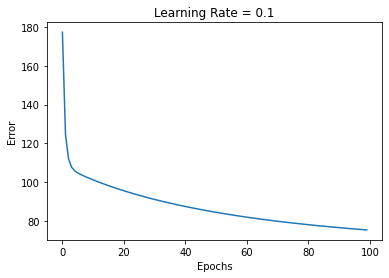

In [45]:
# plot the error
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Learning Rate = " + str(alpha))
plt.plot(np.squeeze(error))
plt.show()

Now we are going to apply the knowledge from the trained neural network model on the test data and use it to infer the result. 

In [46]:
# let's now push our test set through the neural network with our learned weights and bias 
Z_predict = np.dot(W, X_test) + b  

# activation function
Y_hat_predict=np.maximum(0,Z_predict)

# define the size
n = X_test.shape[1]  

# error prediction
E_predict = (1 / n) * np.sum(np.square(Y_hat_predict - Y_test))  

Let's look at the error after training. 

In [47]:
# updated error
E_predict

20.111590380762742

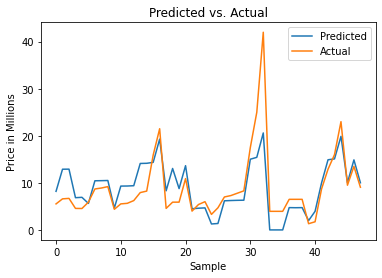

In [48]:
# plot the predicted values vs. the actual values
plt.ylabel('Price in Millions')
plt.xlabel('Sample')
plt.title("Predicted vs. Actual")
plt.plot(np.squeeze(Y_hat_predict),label = "Predicted")
plt.plot(np.squeeze(Y_test), label = "Actual")
plt.legend()
plt.show()

You can see from even this very simple example that a neural net can be setup to train and update its own weights to improve upon its error/cost. 

However, you can also see that using the current single hidden layer network, our predictions are generally correlated but not too accurate. We will cover this in more depth in future chapters, but the reason for this is that our network is unable to represent complex relationships with only a few weights. However, when we take the same concepts discussed above and apply them across multiple layers with more neurons and adjustable weights/biases more complex relationships can be represented. 